In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate_nn as srnn
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats

In [4]:
L63_data_path = '../data/L63-trajectories'
save_folder = '../data/bunching'
name = 'nn'
N = 20000
L0 = 0.4
L1 = 3.5
bunching_threshold = 0.05
n_sample = 500
beta = 4e-5
partition = [300, 0, 0]
train = np.load(f'{L63_data_path}/train.npy')[:, :N].astype(np.float64)
test = np.load(f'{L63_data_path}/test.npy')[:, :, :1000].astype(np.float64)

x = torch.Tensor(train.T[:-1])
y = torch.Tensor(train.T[1:])

model = srnn.SurrogateModel_NN(3, 300, name=name, save_folder=save_folder)
M_r = np.load(f'{model.save_folder}/maxs.npy')
m_r = np.load(f'{model.save_folder}/mins.npy')
tau_f = np.load(f'{model.save_folder}/tau_f.npy')

In [10]:
len(M_r)

500

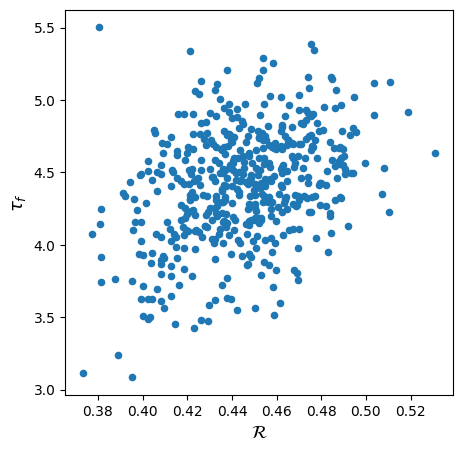

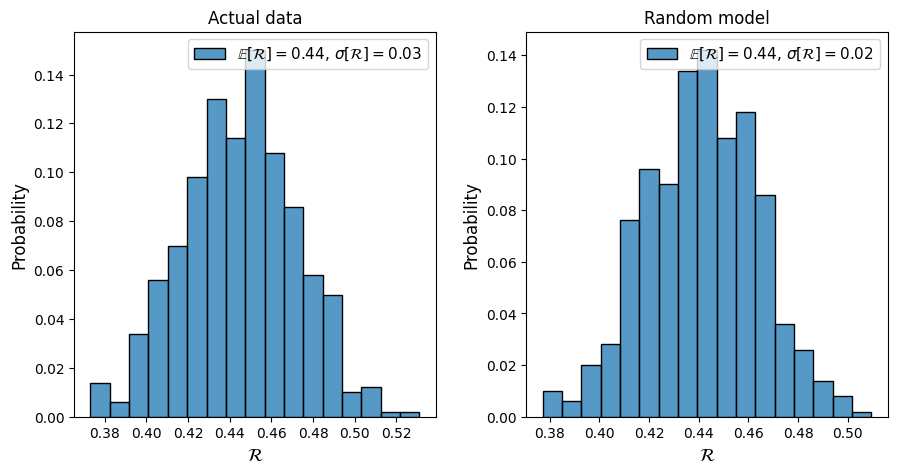

In [28]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(M_r-m_r, tau_f, s=20, label=f'correlation coefficient={stats.pearsonr(M_r-m_r, tau_f).statistic:.2f}')
ax.set_xlabel(r'$\mathcal{R}$', fontsize=13)
ax.set_ylabel(r'$\tau_f$', fontsize=13)
# ax.set_title(r'$D_r=300, p_g=1$')
# ax.legend(fontsize=11)
plt.savefig(f'../data/plots/effective_activation_range.png', dpi=300, bbox_inches='tight')

r = np.zeros(500)
n, eps = 300, 0.67
for i in range(len(r)):
    Mr = np.random.uniform(low=0.4+eps, high=3.5-eps, size=n)
    mr = np.array([np.random.uniform(low=0.4+eps, high=M) for M in Mr])
    r[i] = (Mr-mr).mean()

fig = plt.figure(figsize=(10.5, 5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
R = M_r-m_r
sns.histplot(R, ax=ax, label=r'$\mathbb{E}[\mathcal{R}]=$'+f'{R.mean():.2f},'+r' $\sigma[\mathcal{R}]=$'+f'{R.std():.2f}', stat='probability')
sns.histplot(r, ax=ax1, label=r'$\mathbb{E}[\mathcal{R}]=$'+f'{r.mean():.2f},'+r' $\sigma[\mathcal{R}]=$'+f'{r.std():.2f}', stat='probability')
ax.legend(fontsize=11)
ax1.legend(fontsize=11)
ax.set_xlabel(r'$\mathcal{R}$', fontsize=13)
ax1.set_xlabel(r'$\mathcal{R}$', fontsize=13)
ax.set_title('Actual data')
ax1.set_title('Random model')#('Simulation, '+r'$\varepsilon=0.67$')
ax.set_ylabel(r'Probability', fontsize=12)
ax1.set_ylabel(r'Probability', fontsize=12)
ax.locator_params(nbins=10, axis='x')
fig.subplots_adjust(wspace=0.25)
plt.savefig(f'../data/plots/range_dist.png', dpi=300, bbox_inches='tight')
plt.show()

(array([  8.,  27.,  52.,  77., 120.,  88.,  76.,  30.,  16.,   6.]),
 array([2.03530758, 2.06408932, 2.09287106, 2.1216528 , 2.15043455,
        2.17921629, 2.20799803, 2.23677978, 2.26556152, 2.29434326,
        2.32312501]),
 <BarContainer object of 10 artists>)

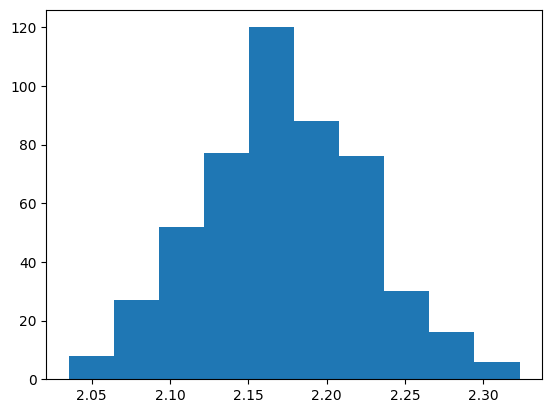

In [3]:
plt.hist(M_r)